In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
housing_pred = pd.read_csv("C://Vikas//DS-UPGRAD-IIITB-2018-2019//Python//Advanced Regression//Assignment//train.csv",  sep = ',', header= 0 )
housing_pred.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#Looking for Rows and Columns of the dataset housing_pred
housing_pred.shape

(1460, 81)

In [4]:
#Fetching Column names in the dataset
housing_pred.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Checking for datatypes of columns in dataframe
housing_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Checking if there are NaN or NULL values in the dataset
housing_pred.isnull().values.any()

True

In [7]:
housing_pred.isna().sum() #Checking the sum of NULL or NaN values in the columns

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
# Calculating percentage for NULL or NaN values
round(100*(housing_pred.isnull().sum()/len(housing_pred.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [9]:
#Taking Backup of original dataset before doing some data cleaning
housing_pred_copy = housing_pred

In [10]:
housing_pred_copy.shape #Checking backup copy created for number of rows and columns

(1460, 81)

In [11]:
#Only shows the columns which have NULL or NaN values
print(round(100*(housing_pred.loc[:, housing_pred.isnull().any()].isnull().sum())/len(housing_pred.index), 2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


For Columns shown above for NaN values <br>

FireplaceQu      47.26% <br>
Alley            93.77% <br>
PoolQC           99.52% <br>
Fence            80.75% <br>
MiscFeature      96.30% <br>
GarageType        5.55% <br> 
GarageFinish      5.55% <br>
GarageQual        5.55% <br>
GarageCond        5.55% <br>
BsmtQual          2.53% <br>
BsmtCond          2.53% <br>
BsmtExposure      2.60% <br>
BsmtFinType1      2.53% <br>
BsmtFinType2      2.60% <br>

It is observed that NA values have been replaced by NaN so we need to impute these column values back to values as defined in data dictionary

In [12]:
housing_pred.FireplaceQu = housing_pred.FireplaceQu.fillna('No Fireplace')
housing_pred.Alley = housing_pred.Alley.fillna('No Alley')
housing_pred.PoolQC = housing_pred.PoolQC.fillna('No Pool')
housing_pred.Fence = housing_pred.Fence.fillna('No Fence')
housing_pred.MiscFeature = housing_pred.MiscFeature.fillna('None')
housing_pred.GarageType = housing_pred.GarageType.fillna('No Garage')
housing_pred.GarageFinish = housing_pred.GarageFinish.fillna('No Garage')
housing_pred.GarageQual = housing_pred.GarageQual.fillna('No Garage')
housing_pred.GarageCond = housing_pred.GarageCond.fillna('No Garage')
housing_pred.BsmtQual = housing_pred.BsmtQual.fillna('No Basement')
housing_pred.BsmtCond = housing_pred.BsmtCond.fillna('No Basement')
housing_pred.BsmtExposure = housing_pred.BsmtExposure.fillna('No Basement')
housing_pred.BsmtFinType1 = housing_pred.BsmtFinType1.fillna('No Basement')
housing_pred.BsmtFinType2 = housing_pred.BsmtFinType2.fillna('No Basement')

In [13]:
print(round(100*(housing_pred.loc[:, housing_pred.isnull().any()].isnull().sum())/len(housing_pred.index), 2))

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64


In [14]:
housing_pred.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

Imputing LotFrontage with mean value as it constitutes ~18%(17.74%) of the total values in LotFrontage

In [15]:
housing_pred.LotFrontage = housing_pred.LotFrontage.fillna(housing_pred.LotFrontage.mean())

In [16]:
#Only shows the columns which have NULL or NaN values
print(round(100*(housing_pred.loc[:, housing_pred.isnull().any()].isnull().sum())/len(housing_pred.index), 2))

MasVnrType     0.55
MasVnrArea     0.55
Electrical     0.07
GarageYrBlt    5.55
dtype: float64


In [17]:
#Removing rows where Electrical is having NaN values
housing_pred = housing_pred[~pd.isnull(housing_pred['Electrical'])]

In [18]:
#Only shows the columns which have NULL or NaN values
print(round(100*(housing_pred.loc[:, housing_pred.isnull().any()].isnull().sum())/len(housing_pred.index), 2))

MasVnrType     0.55
MasVnrArea     0.55
GarageYrBlt    5.55
dtype: float64


In [19]:
# creating dataframe containing all numeric (float and int) variables in the dataset
house_num_variables = housing_pred.select_dtypes(include=['float64', 'int64'])
house_num_variables.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   
1          1976         0.0         978    ...             298            0   
2          2002       162.0         486    ...               0           42   
3          1970         0.0         216    ...               0           35   
4          2000       350.0         655    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [20]:
# creating correlation matrix
corr_matrix = house_num_variables.corr()
corr_matrix

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.010589    -0.009750 -0.033170    -0.027553   
MSSubClass     0.010589    1.000000    -0.357145 -0.139766     0.032936   
LotFrontage   -0.009750   -0.357145     1.000000  0.306804     0.234321   
LotArea       -0.033170   -0.139766     0.306804  1.000000     0.105786   
OverallQual   -0.027553    0.032936     0.234321  0.105786     1.000000   
OverallCond    0.013167   -0.059134    -0.052778 -0.005665    -0.092243   
YearBuilt     -0.013945    0.027435     0.117546  0.014296     0.573334   
YearRemodAdd  -0.023158    0.040199     0.082680  0.013852     0.551605   
MasVnrArea    -0.049736    0.023156     0.179774  0.104141     0.411699   
BsmtFinSF1    -0.004001   -0.069501     0.215989  0.214121     0.239265   
BsmtFinSF2    -0.005668   -0.065549     0.043368  0.111158    -0.059291   
BsmtUnfSF     -0.007508   -0.140627     0.122202 -0.002641     0.308018   
TotalBsmtSF   -0.013815   -0.238160     0.363795  0.260962     0.537523   
1stFlrSF       0.011627   -0.251484     0.414525  0.299533     0.475933   
2ndFlrSF       0.004885    0.307713     0.072433  0.051030     0.295969   
LowQualFinSF  -0.044139    0.046524     0.036860  0.004773    -0.030502   
GrLivArea      0.008524    0.074949     0.368422  0.263109     0.593021   
BsmtFullBath   0.003158    0.003799     0.091578  0.158147     0.110700   
BsmtHalfBath  -0.019917   -0.002243    -0.006397  0.048034    -0.040291   
FullBath       0.004758    0.131354     0.180391  0.126100     0.551267   
HalfBath       0.005494    0.177004     0.048171  0.014333     0.274328   
BedroomAbvGr   0.037577   -0.023502     0.237012  0.119700     0.101789   
KitchenAbvGr   0.003177    0.281833    -0.005785 -0.017796    -0.184040   
TotRmsAbvGrd   0.026948    0.040274     0.320131  0.190037     0.427720   
Fireplaces    -0.018788   -0.045232     0.235917  0.271398     0.396455   
GarageYrBlt   -0.001219    0.084633     0.066403 -0.024881     0.548926   
GarageCars     0.016254   -0.040232     0.269711  0.154893     0.600991   
GarageArea     0.018010   -0.098558     0.323709  0.180392     0.561980   
WoodDeckSF    -0.029716   -0.012598     0.077103  0.171701     0.239000   
OpenPorchSF    0.000267   -0.005838     0.137543  0.084751     0.308554   
EnclosedPorch  0.003272   -0.011904     0.009824 -0.018360    -0.114162   
3SsnPorch     -0.046550   -0.043786     0.062347  0.020417     0.030314   
ScreenPorch    0.001617   -0.025932     0.037710  0.043147     0.064755   
PoolArea       0.057163    0.008309     0.180875  0.077669     0.065143   
MiscVal       -0.006155   -0.007651     0.001176  0.038063    -0.031461   
MoSold         0.021708   -0.013404     0.010204  0.001179     0.070570   
YrSold         0.000566   -0.021461     0.006756 -0.014254    -0.027277   
SalePrice     -0.021756   -0.084230     0.334922  0.263837     0.791069   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.013167  -0.013945     -0.023158   -0.049736   -0.004001   
MSSubClass       -0.059134   0.027435      0.040199    0.023156   -0.069501   
LotFrontage      -0.052778   0.117546      0.082680    0.179774    0.215989   
LotArea          -0.005665   0.014296      0.013852    0.104141    0.214121   
OverallQual      -0.092243   0.573334      0.551605    0.411699    0.239265   
OverallCond       1.000000  -0.375780      0.074158   -0.128333   -0.046595   
YearBuilt        -0.375780   1.000000      0.592512    0.316345    0.250465   
YearRemodAdd      0.074158   0.592512      1.000000    0.180136    0.129259   
MasVnrArea       -0.128333   0.316345      0.180136    1.000000    0.264469   
BsmtFinSF1       -0.046595   0.250465      0.129259    0.264469    1.000000   
BsmtFinSF2        0.040132  -0.048903     -0.067575   -0.072443   -0.050328   
BsmtUnfSF        -0.137008   0.149444      0.181520    0.114298   -0.495718   
TotalBsmtSF      -0.171796   0.393159      0.292546    0.363667    0

In [21]:
housing_pred = housing_pred[~pd.isnull(housing_pred['MasVnrType'])]
housing_pred = housing_pred[~pd.isnull(housing_pred['MasVnrArea'])]

#As per above correlation matrix created for numerical variables, we see there is high multicollinearity between 
#GarageYrBlt and YearBuilt, so it is safe to drop rows(5.55%) in which GarageYrBlt is NaN

housing_pred = housing_pred[~pd.isnull(housing_pred['GarageYrBlt'])]

In [22]:
#Only shows the columns which have NULL or NaN values
print(round(100*(housing_pred.loc[:, housing_pred.isnull().any()].isnull().sum())/len(housing_pred.index), 2))

Series([], dtype: float64)


In [23]:
house_num_variables.isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [24]:
#Clearing the NULL rows for the dataset created for numeric variable to create pairplot between numeric variables
house_num_variables = house_num_variables[~pd.isnull(house_num_variables['MasVnrArea'])]
house_num_variables = house_num_variables[~pd.isnull(house_num_variables['GarageYrBlt'])]

<Figure size 1440x720 with 0 Axes>

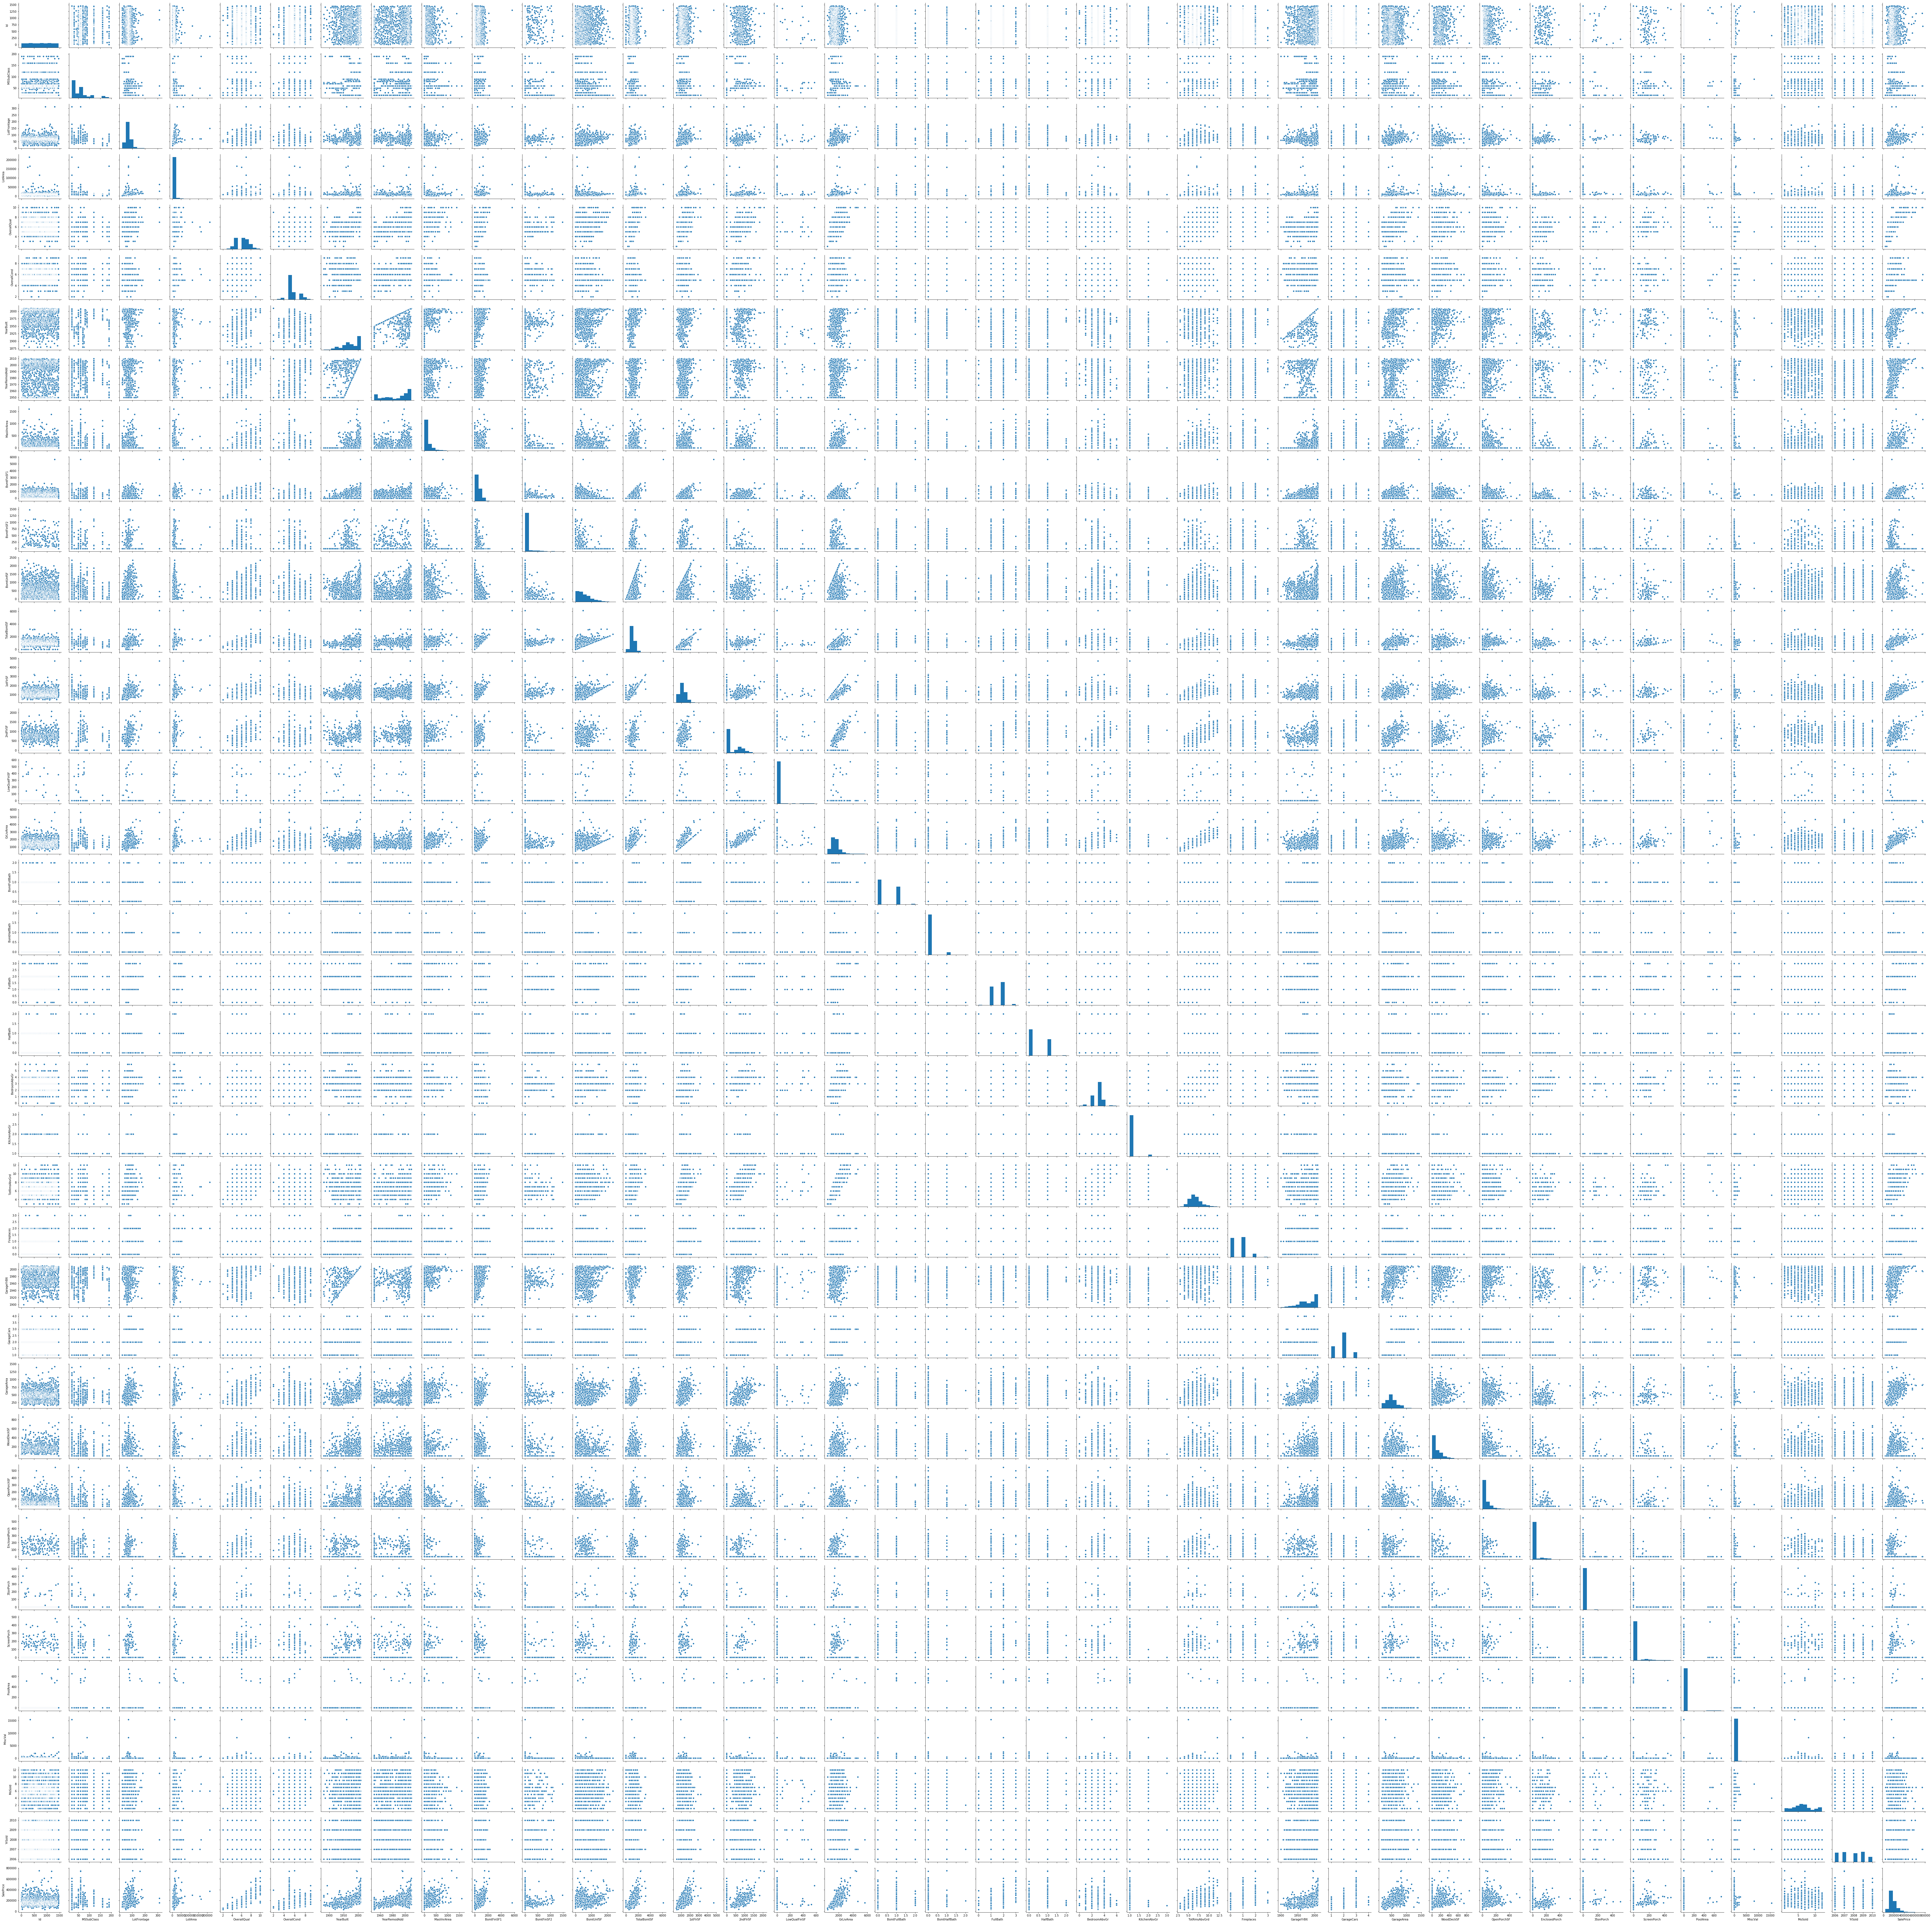

In [25]:
#Pairplot creation for numeric variables in dataframe house_num_variables to see the data points on the plot
# and identify the pattern of distribution
plt.figure(figsize=(20, 10))
sns.pairplot(house_num_variables)
plt.show()

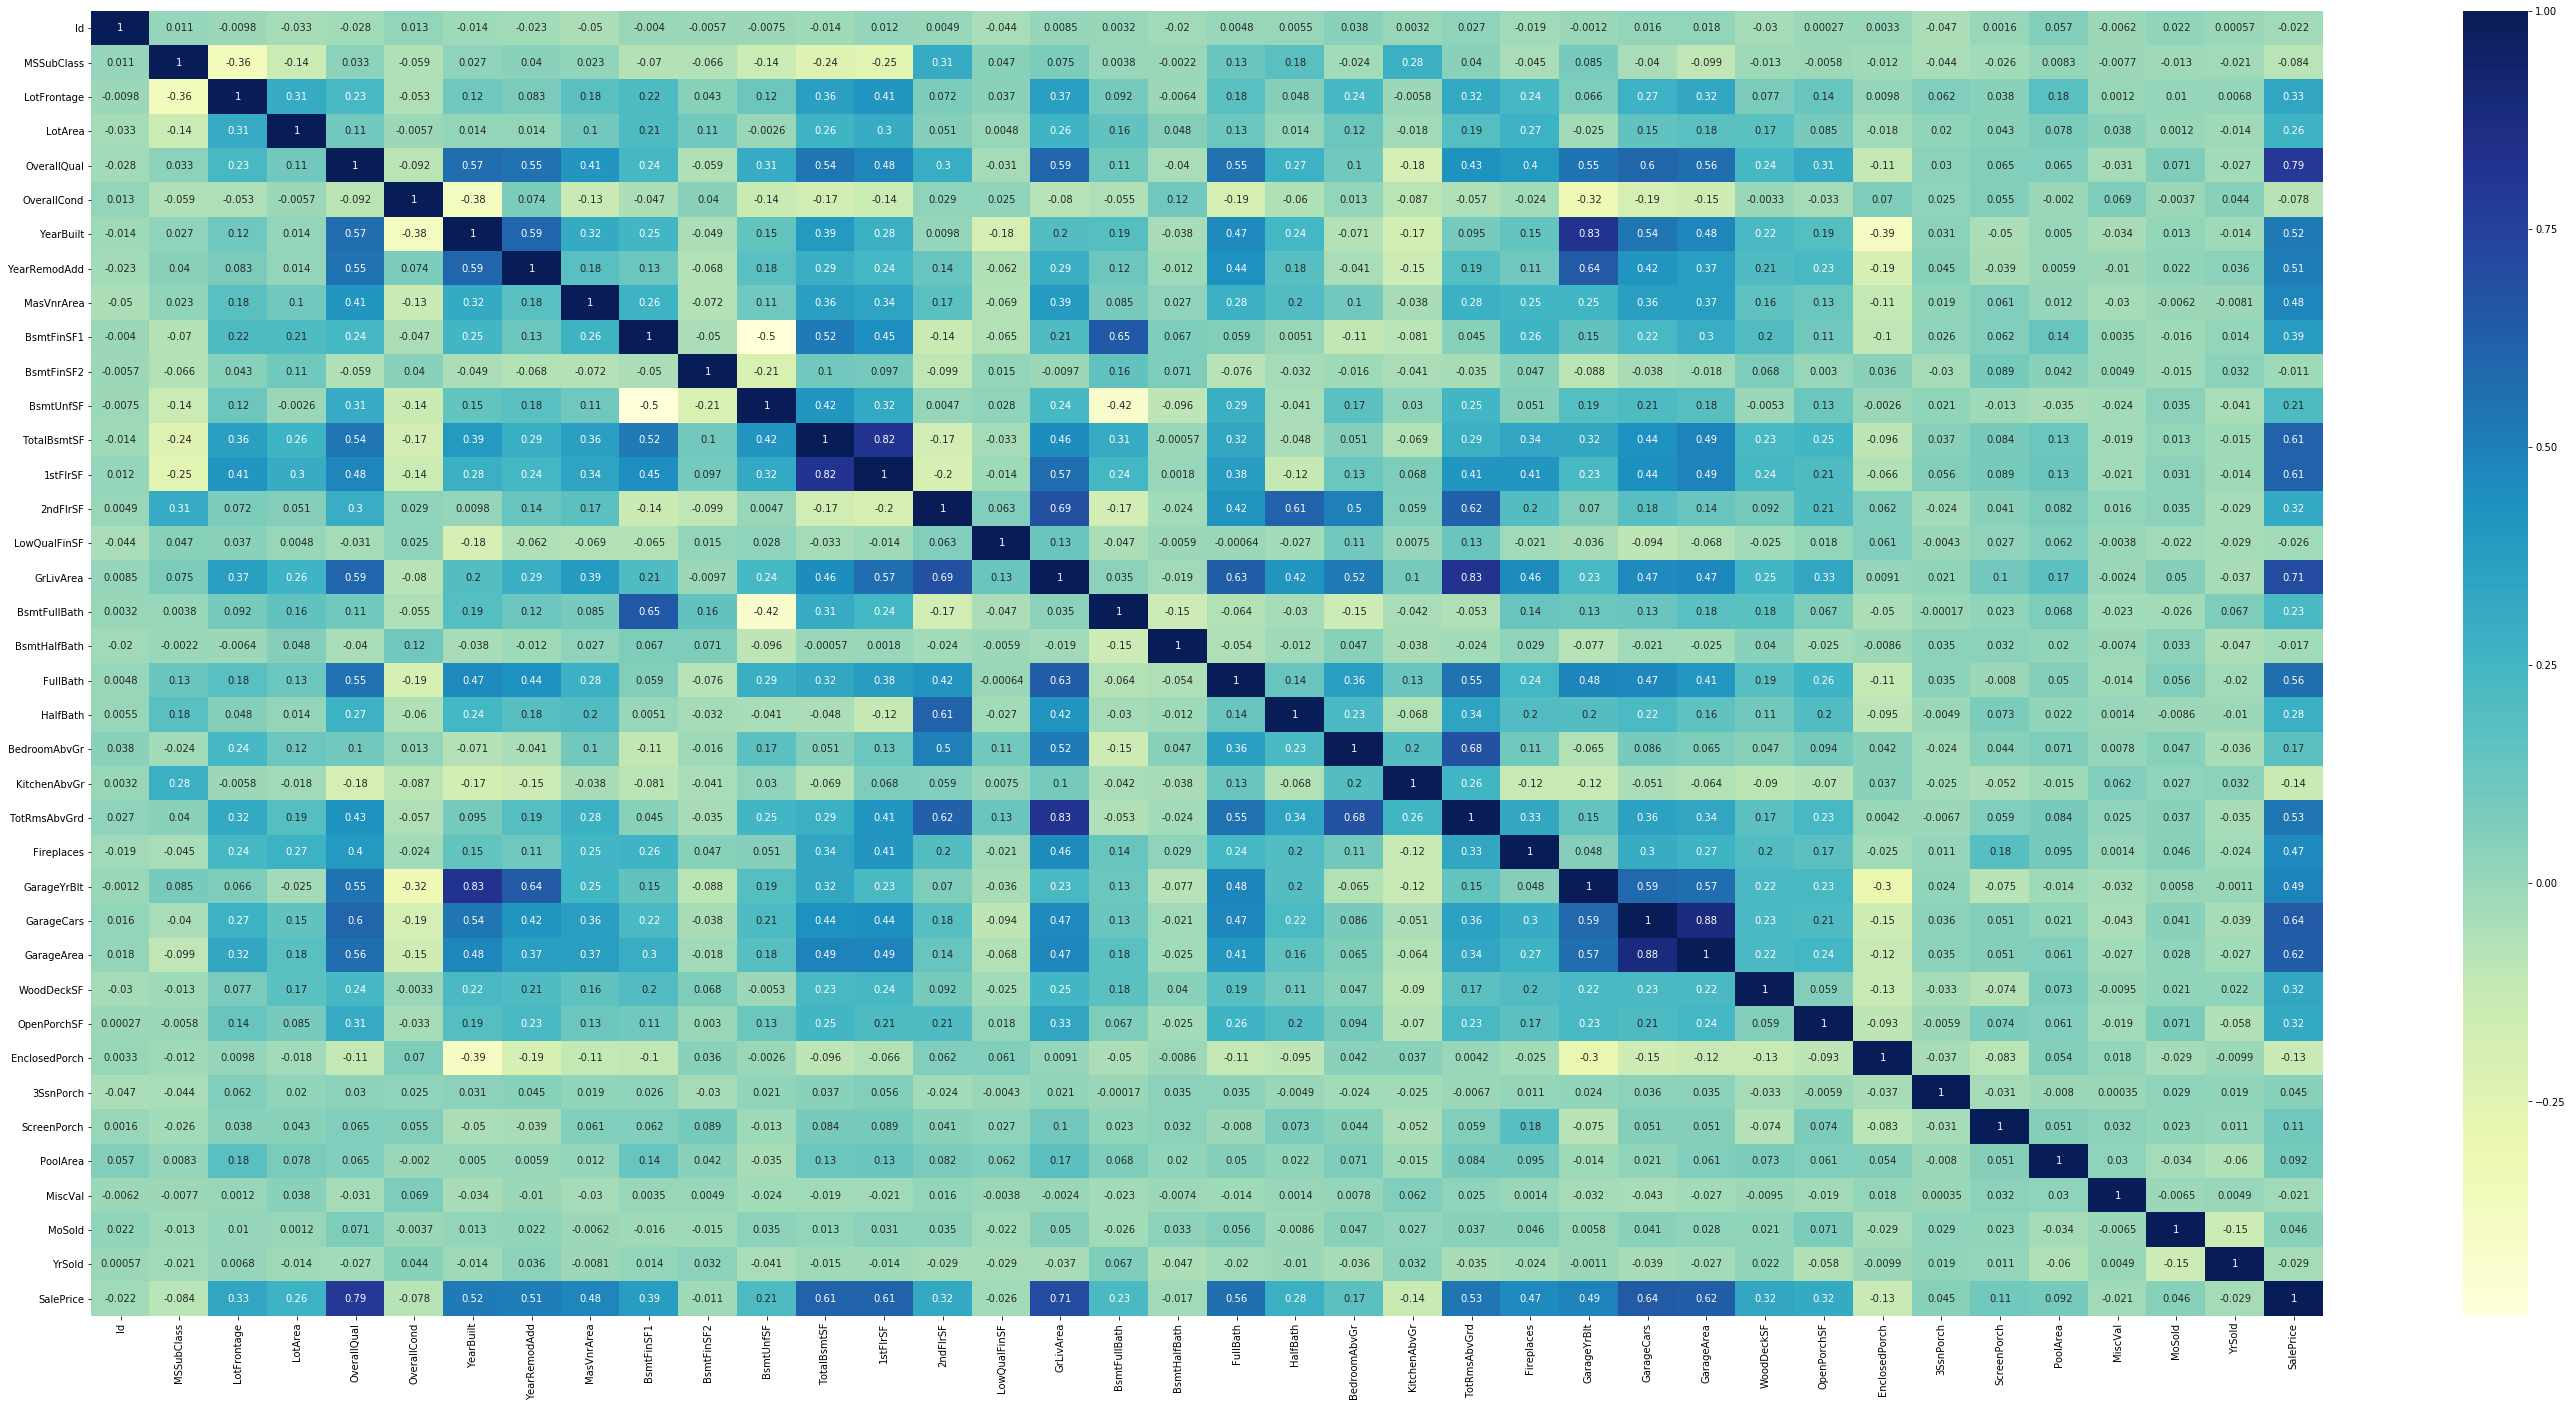

In [26]:
# plotting heatmap to see correlation on numeric variable in dataframe house_num_variables

# figure size
plt.figure(figsize=(50,24))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [27]:
house_num_variables.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1370.00000  1370.000000  1370.000000    1370.000000  1370.000000   
mean    730.69635    56.054745    70.551452   10687.435036     6.181752   
std     421.19485    41.073531    21.950456   10228.507006     1.344236   
min       1.00000    20.000000    21.000000    1300.000000     2.000000   
25%     365.25000    20.000000    60.000000    7731.000000     5.000000   
50%     732.50000    50.000000    70.049958    9591.000000     6.000000   
75%    1093.75000    70.000000    79.000000   11712.750000     7.000000   
max    1460.00000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1370.000000  1370.000000   1370.000000  1370.000000  1370.000000   
mean      5.582482  1972.783942   1985.327007   109.076642   454.211679   
std       1.081480    29.371056     20.452934   184.589326   458.985739   
min       2.000000  1880.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1955.000000   1967.250000     0.000000     0.000000   
50%       5.000000  1975.000000   1994.000000     0.000000   399.500000   
75%       6.000000  2001.000000   2004.000000   171.750000   728.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1370.000000  1370.000000    1370.000000  1370.000000   
mean       ...          97.656204    47.028467      21.031387     3.633577   
std        ...         126.805998    64.995049      60.519492    30.252215   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    27.000000       0.000000     0.000000   
75%        ...         171.000000    69.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1370.000000  1370.000000   1370.000000  1370.000000  1370.000000   
mean     16.050365     2.940146     43.170803     6.331387  2007.811679   
std      57.422820    41.470515    503.247977     2.693166     1.331589   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1370.000000  
mean   185194.797080  
std     78899.705642  
min     35311.000000  
25%    133925.000000  
50%    167000.000000  
75%    217875.000000  
max    755000.000000  

[8 rows x 38 columns]

With above steps we have cleaned the dataset housing_pred and now it contains no NULL or NaN values and total number of rows and columns are (1370, 81). Now in below steps we will study the categorical variables in the dataset housing_pred and convert them to dummy variables.

In [28]:
#Creating dataset for Categorical Variables
house_categor_vars = housing_pred.select_dtypes(include=['object'])
house_categor_vars.head()

MSZoning Street     Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1       RL   Pave  No Alley      Reg         Lvl    AllPub       FR2   
2       RL   Pave  No Alley      IR1         Lvl    AllPub    Inside   
3       RL   Pave  No Alley      IR1         Lvl    AllPub    Corner   
4       RL   Pave  No Alley      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1      ...      GarageType GarageFinish  \
0       Gtl      CollgCr       Norm      ...          Attchd          RFn   
1       Gtl      Veenker      Feedr      ...          Attchd          RFn   
2       Gtl      CollgCr       Norm      ...          Attchd          RFn   
3       Gtl      Crawfor       Norm      ...          Detchd          Unf   
4       Gtl      NoRidge       Norm      ...          Attchd          RFn   

  GarageQual GarageCond PavedDrive   PoolQC     Fence MiscFeature SaleType  \
0         TA         TA          Y  No Pool  No Fence        None       WD   
1         TA         TA          Y  No Pool  No Fence        None       WD   
2         TA         TA          Y  No Pool  No Fence        None       WD   
3         TA         TA          Y  No Pool  No Fence        None       WD   
4         TA         TA          Y  No Pool  No Fence        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 43 columns]

In [29]:
house_categor_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1370 non-null object
Street           1370 non-null object
Alley            1370 non-null object
LotShape         1370 non-null object
LandContour      1370 non-null object
Utilities        1370 non-null object
LotConfig        1370 non-null object
LandSlope        1370 non-null object
Neighborhood     1370 non-null object
Condition1       1370 non-null object
Condition2       1370 non-null object
BldgType         1370 non-null object
HouseStyle       1370 non-null object
RoofStyle        1370 non-null object
RoofMatl         1370 non-null object
Exterior1st      1370 non-null object
Exterior2nd      1370 non-null object
MasVnrType       1370 non-null object
ExterQual        1370 non-null object
ExterCond        1370 non-null object
Foundation       1370 non-null object
BsmtQual         1370 non-null object
BsmtCond         1370 non-null object
BsmtExposure     13

In [30]:
housing_pred.shape # Final numbers of rows and columns in original dataframe post cleaning steps.

(1370, 81)

# Creating X and Y dataframe from original dataframe housing_pred. In X frame 'id' column is not taken as it is just a serial number. Thuse dataframe X contains 79 columns and Y contains SalePrice

In [31]:
X = housing_pred.loc[:, [ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
'Street', 'Alley', 'LotShape', 'LandContour',
'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 
'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 
'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 
'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 
'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
'3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
'YrSold', 'SaleType', 'SaleCondition'  ,]]

y = housing_pred['SalePrice']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1370 non-null int64
MSZoning         1370 non-null object
LotFrontage      1370 non-null float64
LotArea          1370 non-null int64
Street           1370 non-null object
Alley            1370 non-null object
LotShape         1370 non-null object
LandContour      1370 non-null object
Utilities        1370 non-null object
LotConfig        1370 non-null object
LandSlope        1370 non-null object
Neighborhood     1370 non-null object
Condition1       1370 non-null object
Condition2       1370 non-null object
BldgType         1370 non-null object
HouseStyle       1370 non-null object
OverallQual      1370 non-null int64
OverallCond      1370 non-null int64
YearBuilt        1370 non-null int64
YearRemodAdd     1370 non-null int64
RoofStyle        1370 non-null object
RoofMatl         1370 non-null object
Exterior1st      1370 non-null object
Exterior2nd      1370 no

Creating dummy variables for categorical columns in the dataframe using get_dummies using the dataframe created above house_categor_vars

In [33]:
house_categor_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1370 non-null object
Street           1370 non-null object
Alley            1370 non-null object
LotShape         1370 non-null object
LandContour      1370 non-null object
Utilities        1370 non-null object
LotConfig        1370 non-null object
LandSlope        1370 non-null object
Neighborhood     1370 non-null object
Condition1       1370 non-null object
Condition2       1370 non-null object
BldgType         1370 non-null object
HouseStyle       1370 non-null object
RoofStyle        1370 non-null object
RoofMatl         1370 non-null object
Exterior1st      1370 non-null object
Exterior2nd      1370 non-null object
MasVnrType       1370 non-null object
ExterQual        1370 non-null object
ExterCond        1370 non-null object
Foundation       1370 non-null object
BsmtQual         1370 non-null object
BsmtCond         1370 non-null object
BsmtExposure     13

In [34]:
house_dummy_vars = pd.get_dummies(house_categor_vars, drop_first=True)
house_dummy_vars.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No Alley  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0               1           0             0             0             1   
1               1           0             0             0             1   
2               1           0             0             0             0   
3               1           0             0             0             0   
4               1           0             0             0             0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 217 columns]

In [35]:
# dropping categorical variables from X dataframe created above
X = X.drop(list(house_categor_vars.columns), axis=1)

In [36]:
X.info() #post dropping categorical variables verifying X dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 36 columns):
MSSubClass       1370 non-null int64
LotFrontage      1370 non-null float64
LotArea          1370 non-null int64
OverallQual      1370 non-null int64
OverallCond      1370 non-null int64
YearBuilt        1370 non-null int64
YearRemodAdd     1370 non-null int64
MasVnrArea       1370 non-null float64
BsmtFinSF1       1370 non-null int64
BsmtFinSF2       1370 non-null int64
BsmtUnfSF        1370 non-null int64
TotalBsmtSF      1370 non-null int64
1stFlrSF         1370 non-null int64
2ndFlrSF         1370 non-null int64
LowQualFinSF     1370 non-null int64
GrLivArea        1370 non-null int64
BsmtFullBath     1370 non-null int64
BsmtHalfBath     1370 non-null int64
FullBath         1370 non-null int64
HalfBath         1370 non-null int64
BedroomAbvGr     1370 non-null int64
KitchenAbvGr     1370 non-null int64
TotRmsAbvGrd     1370 non-null int64
Fireplaces       1370 non-null int64
G

In [37]:
# concatenating dummy variables created above in house_dummy_vars dataframe with X
X = pd.concat([X, house_dummy_vars], axis=1)

In [38]:
X.info() #post concatenation of dummy variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Columns: 253 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(217)
memory usage: 686.3 KB


In [39]:
house_num_variables.columns #Viewing columns in dataframe created for numerical variables.

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [40]:
house_num_variables.shape

(1370, 38)

In [41]:
#Storing in a variable as it is to be used in scaler such that only Numerical Variables get scaled
Numerical_Variables = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

In [42]:
# split X and y dataframe into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Scaling all the numerical variables after creating train and test split

In [43]:
from sklearn.preprocessing import StandardScaler #Using Standard Scaler for scaling the features

In [44]:
scaler = StandardScaler()

In [45]:
# scaling the features in X_train
X_train[Numerical_Variables] = scaler.fit_transform(X_train[Numerical_Variables])

In [46]:
# scaling the features in X_test
X_test[Numerical_Variables] = scaler.fit_transform(X_test[Numerical_Variables])

# Model Building and Evaluation

# Ridge and Lasso Regression

Let's now try predicting house prices by performing ridge and lasso regression.

# Ridge Regression

In [47]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.044449      0.032191         0.001411        0.000996      0.0001   
1       0.016557      0.002687         0.001280        0.002560       0.001   
2       0.018193      0.002898         0.001429        0.002391        0.01   
3       0.033968      0.020847         0.000629        0.000514        0.05   
4       0.023189      0.003275         0.000799        0.000748         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -23827.482166      -21007.433157      -18390.297567   
1   {'alpha': 0.001}      -23837.837900      -20994.435821      -18368.087495   
2    {'alpha': 0.01}      -23866.555964      -20928.311068      -18123.972443   
3    {'alpha': 0.05}      -23737.680757      -20866.685958      -17657.703375   
4     {'alpha': 0.1}      -23584.140442      -20808.200346      -17474.494701   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -18178.306171       ...           -20655.752332     2141.628256   
1      -18109.721234       ...           -20624.307724     2157.712864   
2      -17566.909684       ...           -20348.952239     2289.980224   
3      -17399.670943       ...           -19973.518535     2324.836937   
4      -17731.568362       ...           -19873.191756     2237.303902   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -11431.108682       -12007.915620   
1               26       -11433.614173       -12011.601415   
2               25       -11454.048929       -12047.463174   
3               24       -11572.412726       -12157.990002   
4               23       -11734.137408       -12253.301716   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11674.125434       -11694.995387       -11840.442560   
1       -11679.907833       -11691.925502       -11841.494264   
2       -11757.314724       -11725.534663       -11894.465576   
3       -12201.990913       -12114.929599       -12319.949310   
4       -12660.415916       -12558.937696       -12798.581180   

   mean_train_score  std_train_score  
0     -11729.717537       191.372705  
1     -11731.708638       191.582453  
2     -11775.765413       197.116440  
3     -12073.454510       259.688504  
4     -12401.074783       378.637611  

[5 rows x 21 columns]

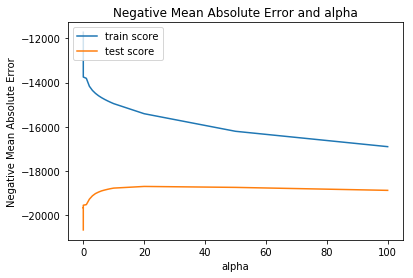

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.85139452e+03, -3.60650307e+03,  6.76717959e+03,  1.45672440e+04,
        4.50352993e+03,  4.68875118e+03,  2.08176648e+03,  3.01267357e+03,
       -9.19929231e+01,  3.18470036e+01, -9.69462203e+02, -1.04626378e+03,
        6.80802488e+03,  7.35901375e+03,  1.63366127e+03,  1.17640162e+04,
        3.96039117e+03, -6.26708722e+02,  5.30978325e+03,  2.91742701e+03,
       -3.17309659e+03, -3.63895827e+03,  7.78172304e+03,  4.34284263e+02,
       -1.65052867e+03,  7.26770421e+03,  7.89567983e+02,  2.72058722e+03,
        2.60023447e+02,  1.74784195e+03,  2.13920363e+02,  3.05764529e+03,
       -1.59002973e+03, -1.89077726e+02, -5.28690627e+02, -2.36244744e+02,
        7.52510208e+03,  2.86403905e+03,  4.41010034e+03, -1.65027571e+03,
        1.97679141e+04,  2.54401064e+03,  2.15136579e+03,  6.71277435e+03,
       -1.28583931e+04, -1.16889268e+03,  1.25435266e+04, -2.93264218e+03,
        1.01963850e+04, -7.02794695e+03,  1.11380985e+04, -8.40886528e+03,
       -5.21626460e+03,  

In [51]:
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

In [52]:
ridge_train_score,ridge_test_score

(0.9102791616673728, 0.8189105694883323)

In [53]:
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,15,20,30,40,50,60]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [54]:
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 15, 20, 30, 40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-1086853379.8983662


# Lasso Regression

In [56]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   37.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.314316      0.031025         0.000599        0.000489      0.0001   
1       0.298614      0.031032         0.000200        0.000399       0.001   
2       0.310052      0.030907         0.000442        0.000546        0.01   
3       0.322257      0.061240         0.001263        0.002063        0.05   
4       0.280592      0.082575         0.001674        0.001891         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -24873.944364      -21104.791719      -19241.865500   
1   {'alpha': 0.001}      -24881.850349      -21105.140136      -19237.732874   
2    {'alpha': 0.01}      -24891.629181      -21108.237737      -19175.571045   
3    {'alpha': 0.05}      -24910.064036      -21107.557962      -18989.946858   
4     {'alpha': 0.1}      -24921.466915      -21106.849436      -18768.465242   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -18644.630607       ...           -22073.675210     3103.579254   
1      -18644.297050       ...           -22074.670164     3106.154030   
2      -18641.806032       ...           -22066.596991     3123.020223   
3      -18638.383395       ...           -22042.576489     3176.935294   
4      -18617.233031       ...           -22009.152819     3245.585074   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -11441.002464       -12020.666686   
1               28       -11441.017491       -12020.656326   
2               26       -11441.233566       -12020.747221   
3               25       -11442.479027       -12021.576772   
4               23       -11443.861868       -12022.693999   

   split2_train_score  split3_train_score  split4_train_score  \
0       -11704.998550       -11696.964303       -11837.759558   
1       -11704.982952       -11696.932898       -11837.749275   
2       -11704.971193       -11696.975036       -11837.859510   
3       -11705.223350       -11697.531478       -11838.675431   
4       -11705.887544       -11698.429850       -11840.332658   

   mean_train_score  std_train_score  
0     -11740.278312       190.161527  
1     -11740.267788       190.154698  
2     -11740.357305       190.123325  
3     -11741.097212       190.025272  
4     -11742.241184       190.024712  

[5 rows x 21 columns]

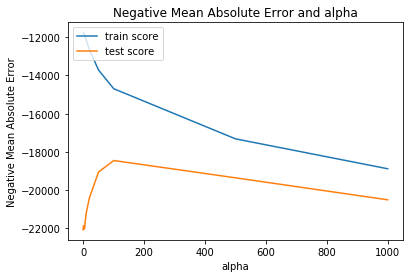

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [59]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
lasso.coef_

array([ -7041.98154333,  -3339.27339181,   5948.52779174,  14436.06610909,
         4938.64171097,   5896.18554124,   1575.20665945,   2626.87411754,
          857.58295599,    266.53452106,     -0.        ,    157.56070086,
          397.32853887,      0.        ,    491.30623713,  18613.4977338 ,
         4298.12568526,   -412.48704362,   4812.29582175,   2299.69767575,
        -2569.85358263,  -4604.83753048,   8368.07728843,   1465.42522606,
         -160.40537188,   7505.02984363,    413.85507823,   2933.05288875,
          752.8387274 ,    902.26558695,     -0.        ,   3028.47529685,
           -0.        ,   -178.56497866,   -391.20612796,     -0.        ,
         1500.12213843,     -0.        ,      0.        ,  -4605.44725717,
        25820.08993556,      0.        ,      0.        ,   5531.57826093,
        -7758.62388324,   -692.56482805,   8832.61520885,     -0.        ,
         8061.42435847,     -0.        ,  10703.40236922,  -6267.8983517 ,
           -0.        ,  

In [61]:
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

In [62]:
lasso_train_score,lasso_test_score

(0.9057560318213248, 0.8237442938272458)

In [63]:
## lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9057560318213248
0.8237442938272458


In [64]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 153623.794),
 ('MSSubClass', -7041.982),
 ('LotFrontage', -3339.273),
 ('LotArea', 5948.528),
 ('OverallQual', 14436.066),
 ('OverallCond', 4938.642),
 ('YearBuilt', 5896.186),
 ('YearRemodAdd', 1575.207),
 ('MasVnrArea', 2626.874),
 ('BsmtFinSF1', 857.583),
 ('BsmtFinSF2', 266.535),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 157.561),
 ('1stFlrSF', 397.329),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 491.306),
 ('GrLivArea', 18613.498),
 ('BsmtFullBath', 4298.126),
 ('BsmtHalfBath', -412.487),
 ('FullBath', 4812.296),
 ('HalfBath', 2299.698),
 ('BedroomAbvGr', -2569.854),
 ('KitchenAbvGr', -4604.838),
 ('TotRmsAbvGrd', 8368.077),
 ('Fireplaces', 1465.425),
 ('GarageYrBlt', -160.405),
 ('GarageCars', 7505.03),
 ('GarageArea', 413.855),
 ('WoodDeckSF', 2933.053),
 ('OpenPorchSF', 752.839),
 ('EnclosedPorch', 902.266),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 3028.475),
 ('PoolArea', -0.0),
 ('MiscVal', -178.565),
 ('MoSold', -391.206),
 ('YrSold', -0.0),
 ('MSZoning_FV', 1500.122),
 

# With Lasso Regression applied above we have got the features which are influencing the model and model which are not required are assigned 0 value hence we will drop those columns with zero 0.0 value and will apply the Ridge Regression again on the dataframe that will be created now.

In [65]:
house_lasso_ridge = X #Creating new dataframe house_lasso_ridge from X dataframe created above

In [66]:
house_lasso_ridge.shape #Checking for rows and columns

(1370, 253)

In [67]:
house_lasso_ridge.head() #Checking first few rows in the dataframe

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003       196.0         706           0          ...             
1          1976         0.0         978           0          ...             
2          2002       162.0         486           0          ...             
3          1970         0.0         216           0          ...             
4          2000       350.0         655           0          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 253 columns]

In [68]:
house_lasso_ridge.columns #Checking for the columns in the dataframe

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

# Dropping 135 columns with 0.0 as coefficient value after Lasso Regression

In [69]:
house_lasso_ridge = house_lasso_ridge.drop('BsmtUnfSF', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('2ndFlrSF', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('3SsnPorch', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('PoolArea', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('YrSold', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('MSZoning_RH', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('MSZoning_RL', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Alley_No Alley', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Alley_Pave', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('LandContour_Low', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Utilities_NoSeWa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('LotConfig_FR3', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('LandSlope_Mod', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_Blueste', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_BrDale', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_CollgCr', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_Gilbert', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_IDOTRR', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_MeadowV', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_NPkVill', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_SWISU', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_Sawyer', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_SawyerW', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_Timber', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Neighborhood_Veenker', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition1_PosA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition1_PosN', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition1_RRAe', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition1_RRAn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition1_RRNe', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition1_RRNn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_Feedr', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_Norm', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_PosA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_PosN', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_RRAe', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_RRAn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Condition2_RRNn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BldgType_Duplex', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('HouseStyle_1.5Unf', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('HouseStyle_2.5Fin', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('HouseStyle_2.5Unf', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('HouseStyle_SFoyer', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofStyle_Gambrel', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofStyle_Hip', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofStyle_Mansard', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofStyle_Shed', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofMatl_Membran', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofMatl_Metal', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofMatl_Roll', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofMatl_Tar&Grv', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('RoofMatl_WdShake', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_BrkComm', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_CBlock', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_ImStucc', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_Plywood', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_Stone', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_VinylSd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior1st_WdShing', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_AsphShn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_Brk Cmn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_BrkFace', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_CBlock', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_CmentBd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_HdBoard', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_ImStucc', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_MetalSd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_Other', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_Plywood', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_Stone', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Exterior2nd_Wd Sdng', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('ExterQual_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('ExterCond_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('ExterCond_TA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Foundation_Slab', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Foundation_Stone', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Foundation_Wood', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtQual_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtCond_Gd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtCond_Po', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtExposure_Mn', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtFinType1_LwQ', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtFinType1_Rec', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtFinType2_BLQ', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtFinType2_GLQ', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtFinType2_LwQ', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('BsmtFinType2_No Basement', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Heating_GasA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Heating_Grav', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Heating_OthW', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Heating_Wall', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('HeatingQC_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('HeatingQC_Po', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('CentralAir_Y', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Electrical_FuseF', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Electrical_FuseP', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Electrical_Mix', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Electrical_SBrkr', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Functional_Maj2', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Functional_Min1', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Functional_Min2', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Functional_Mod', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Functional_Sev', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('FireplaceQu_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('FireplaceQu_Gd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('FireplaceQu_Po', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('FireplaceQu_TA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageType_Attchd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageType_Basment', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageType_CarPort', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageType_Detchd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageFinish_Unf', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageQual_Po', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageQual_TA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageCond_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageCond_Gd', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageCond_Po', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('GarageCond_TA', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('PavedDrive_P', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('PoolQC_Fa', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('PoolQC_No Pool', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Fence_GdWo', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('Fence_MnWw', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('MiscFeature_Othr', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('MiscFeature_Shed', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('MiscFeature_TenC', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleType_CWD', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleType_Con', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleType_ConLD', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleType_ConLI', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleType_ConLw', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleType_Oth', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleCondition_AdjLand', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleCondition_Family', axis=1)
house_lasso_ridge = house_lasso_ridge.drop('SaleCondition_Partial', axis=1)

In [70]:
house_lasso_ridge.shape #Checkings numbers of rows and columns post dropping of variables.

(1370, 118)

In [71]:
house_lasso_ridge.columns #Checking columns in the dataframe post dropping of variables.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'GarageQual_Gd', 'PavedDrive_Y', 'PoolQC_Gd', 'Fence_MnPrv',
       'Fence_No Fence', 'MiscFeature_None', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Normal'],
      dtype='object', length=118)

In [72]:
# all numeric (float and int) variables in the dataset house_lr_num_variables
house_lr_num_variables = house_lasso_ridge.select_dtypes(include=['float64', 'int64'])
house_lr_num_variables.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   ...    Fireplaces  \
0          2003       196.0         706           0   ...             0   
1          1976         0.0         978           0   ...             1   
2          2002       162.0         486           0   ...             1   
3          1970         0.0         216           0   ...             1   
4          2000       350.0         655           0   ...             1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  ScreenPorch  MiscVal  MoSold  
0              0            0        0       2  
1              0            0        0       5  
2              0            0        0       9  
3            272            0        0       2  
4              0            0        0      12  

[5 rows x 31 columns]

In [73]:
house_lr_num_variables.columns #Checking for columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'MoSold'],
      dtype='object')

In [74]:
#Storing in a variable as it is to be used in scaler such that only Numerical Variables get scaled

lr_num_variables = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'MoSold']

In [75]:
X_lasso_ridge = house_lasso_ridge #Creating new dataframe X_lasso_ridge from house_lasso_ridge created above.

In [76]:
#Splitting the data in train and test set.
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lasso_ridge, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Scaling all the numerical variables after creating train and test split

In [77]:
#Using Standard Scaler to scale the variables
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
# scaling the features in X_train
X_train_lr[lr_num_variables] = scaler.fit_transform(X_train_lr[lr_num_variables])

In [80]:
# scaling the features in X_test
X_test_lr[lr_num_variables] = scaler.fit_transform(X_test_lr[lr_num_variables])

In [81]:
X_train_lr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
178    -0.847579    -0.346644  0.551012     2.128794    -0.556706   1.217757   
1276    0.122095    -0.037072  0.168862    -0.131329     0.345704  -0.012449   
770     0.728141    -0.037072 -0.315234    -0.884704    -0.556706   0.329275   
667    -0.847579    -0.258821 -0.240882    -0.131329    -0.556706   0.739343   
1295   -0.847579    -0.039265 -0.217461    -0.884704    -0.556706  -0.149139   
28     -0.847579    -1.049223  0.457156    -0.884704     0.345704  -0.525035   
347    -0.847579    -0.037072  0.566087    -0.131329    -0.556706  -0.422518   
1050   -0.847579     0.092468 -0.166956     0.622045    -0.556706   1.183584   
957    -0.847579    -0.039265 -0.300926    -0.884704    -0.556706  -0.354173   
1273    0.606932     2.331939  0.047582    -0.131329     1.248115  -0.456690   
1377   -0.120324    -0.478377  0.003806    -0.884704    -0.556706  -1.071793   
429    -0.847579     2.595406  0.042898    -0.131329    -0.556706   0.534309   
1253    0.122095    -0.037072  0.561147     0.622045     1.248115   0.055896   
814    -0.120324    -1.137045 -0.230407    -0.884704     1.248115  -1.857758   
588    -0.847579    -0.258821  1.204422    -0.884704     2.150525  -0.149139   
565     0.364513    -0.214910 -0.348791    -0.131329    -1.459117  -1.960275   
1439    0.122095     0.399847  0.053714     0.622045     0.345704   0.226758   
701    -0.847579     0.399847 -0.115259     0.622045    -0.556706  -0.114966   
451    -0.847579    -0.390555  5.093715     0.622045    -0.556706   0.090068   
45      1.576606    -0.434466 -0.280656     2.128794    -0.556706   1.115240   
427    -0.847579     0.268113 -0.201024    -1.638078     0.345704  -0.525035   
1396   -0.847579    -0.037072  3.938749    -0.884704    -0.556706  -0.832586   
1021   -0.847579    -0.302732 -0.302118     0.622045    -0.556706   1.149412   
323    -0.847579    -0.961400 -0.437195    -2.391453     2.150525  -0.593380   
717    -0.847579     0.399847 -0.081192    -0.884704     0.345704   0.021723   
570     0.849351     0.136379  0.182915    -0.884704    -0.556706  -0.251656   
414     0.122095    -0.522288  0.023395     0.622045    -0.556706   0.705171   
676     0.364513    -0.478377 -0.115259    -1.638078    -3.263938  -2.472861   
1459   -0.847579     0.180291 -0.086558    -0.884704     0.345704  -0.251656   
1454   -0.847579    -0.390555 -0.294113     0.622045    -0.556706   1.081067   
...          ...          ...       ...          ...          ...        ...   
662    -0.847579     2.156294  0.222007    -0.131329    -2.361527  -0.149139   
944    -0.847579    -0.037072  0.291419    -0.131329     0.345704  -0.490862   
2       0.122095    -0.127088  0.025268     0.622045    -0.556706   0.978550   
813    -0.847579     0.180291 -0.102484    -0.131329     0.345704  -0.490862   
1032    0.122095    -0.037072  0.305557     1.375420     1.248115   0.705171   
833    -0.847579     1.278070 -0.080851    -0.131329     0.345704  -0.285828   
339    -0.847579    -0.214910  0.123212    -0.131329     1.248115  -0.490862   
51     -0.120324    -0.829667 -0.401425    -0.131329     0.345704  -1.311000   
145     2.546280    -2.059180 -0.718080    -0.131329    -0.556706   1.081067   
887    -0.120324    -0.522288  0.469506    -0.884704     1.248115  -0.593380   
646    -0.847579    -0.478377 -0.319663    -0.884704    -0.556706  -0.764241   
1094   -0.847579     0.136379 -0.433107    -0.884704     1.248115  -0.559207   
657     0.364513    -0.478377 -0.319663     0.622045     0.345704  -1.413517   
807     0.364513     3.210162  0.888363    -0.884704     0.345704  -1.686896   
1241   -0.847579     0.531580 -0.094052     0.622045     0.345704   1.183584   
952     0.728141    -0.478377 -0.319663    -0.884704     2.150525  -0.012449   
443     1.576606    -0.785756 -0.598845     0.622045    -0.556706   1.149412   
411     3.273536     1.278070  2.018205    -0.884704    -0.556706  -0.593380   
91    

# Applying Ridge Regression now

In [82]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lr, y_train_lr
            ) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008129      0.010462         0.001492        0.002228      0.0001   
1       0.008454      0.003611         0.000712        0.000743       0.001   
2       0.005889      0.002976         0.003417        0.003906        0.01   
3       0.008634      0.004287         0.000399        0.000488        0.05   
4       0.009429      0.007894         0.000200        0.000399         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21508.806800      -19387.149485      -15941.984066   
1   {'alpha': 0.001}      -21499.461229      -19386.540540      -15941.708048   
2    {'alpha': 0.01}      -21408.925579      -19380.570555      -15938.939100   
3    {'alpha': 0.05}      -21111.419319      -19356.415151      -15926.469469   
4     {'alpha': 0.1}      -20897.383012      -19330.736825      -15910.911305   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -17288.456920       ...           -18316.201010     1940.209690   
1      -17288.304350       ...           -18314.211502     1937.104128   
2      -17286.738222       ...           -18294.901614     1907.146825   
3      -17278.962731       ...           -18230.111413     1810.447770   
4      -17276.393435       ...           -18182.860585     1742.057193   

   rank_test_score  split0_train_score  split1_train_score  \
0               24       -12845.601930       -13715.316708   
1               23       -12845.026623       -13715.352367   
2               22       -12842.048177       -13715.719282   
3               21       -12862.107735       -13718.181791   
4               20       -12941.088887       -13721.203634   

   split2_train_score  split3_train_score  split4_train_score  \
0       -15631.289863       -15161.005432       -15285.113214   
1       -15631.464973       -15161.102114       -15285.163692   
2       -15633.170756       -15162.033279       -15285.648026   
3       -15640.107658       -15166.301930       -15288.151126   
4       -15646.929013       -15172.795267       -15291.674516   

   mean_train_score  std_train_score  
0     -14527.665429      1066.028297  
1     -14527.621954      1066.259344  
2     -14527.723904      1067.676380  
3     -14534.970048      1063.278157  
4     -14554.738264      1040.826059  

[5 rows x 21 columns]

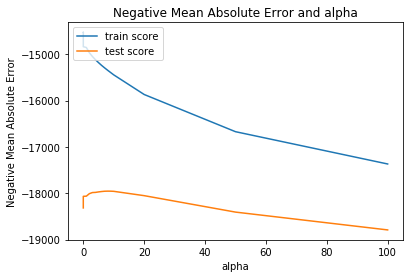

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lr, y_train_lr)
ridge.coef_

array([ -6064.07145226,  -3976.81276339,   6120.07850244,  14809.59010355,
         4887.7106666 ,   3944.94809786,   1905.03812044,   3253.62676649,
          476.65327447,    510.24702165,  -1879.49529137,   1262.72488992,
          738.93538586,  18045.52864181,   4177.03064429,   -667.87529917,
         5591.93193132,   3325.2926559 ,  -3106.46212692,  -4434.11410089,
         8733.66835637,    625.38281954,  -1318.60372643,   7521.31295568,
          724.39636704,   2699.96026317,    169.72663068,   1284.84647608,
         3190.54962736,   -102.1970424 ,   -406.8729751 ,   5052.63878673,
        -5771.5892163 ,  21914.73778922,   7325.81809892, -13704.03982263,
         -948.14192026,  12900.65958823,  10445.34826234,  10798.61599472,
        -8426.84203239,    990.34713929,  -9506.07549581,   8301.52035671,
         8327.15654945,  18129.86825817, -11755.69717117,  -9159.4086857 ,
        -5668.63369913,  -7279.85104874,  29679.86799162,  30683.05783868,
        -4067.76550052,  

In [86]:
lr_train_score = ridge.score(X_train_lr, y_train_lr)
lr_test_score = ridge.score(X_test_lr, y_test_lr)

In [87]:
lr_train_score,lr_test_score

(0.9058601010899553, 0.8227087737493888)

In [88]:
# model coefficients
cols = X_lasso_ridge.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 153623.794),
 ('MSSubClass', -7041.982),
 ('LotFrontage', -3339.273),
 ('LotArea', 5948.528),
 ('OverallQual', 14436.066),
 ('OverallCond', 4938.642),
 ('YearBuilt', 5896.186),
 ('YearRemodAdd', 1575.207),
 ('MasVnrArea', 2626.874),
 ('BsmtFinSF1', 857.583),
 ('BsmtFinSF2', 266.535),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 157.561),
 ('LowQualFinSF', 397.329),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 491.306),
 ('BsmtHalfBath', 18613.498),
 ('FullBath', 4298.126),
 ('HalfBath', -412.487),
 ('BedroomAbvGr', 4812.296),
 ('KitchenAbvGr', 2299.698),
 ('TotRmsAbvGrd', -2569.854),
 ('Fireplaces', -4604.838),
 ('GarageYrBlt', 8368.077),
 ('GarageCars', 1465.425),
 ('GarageArea', -160.405),
 ('WoodDeckSF', 7505.03),
 ('OpenPorchSF', 413.855),
 ('EnclosedPorch', 2933.053),
 ('ScreenPorch', 752.839),
 ('MiscVal', 902.266),
 ('MoSold', -0.0),
 ('MSZoning_FV', 3028.475),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', -178.565),
 ('LotShape_IR2', -391.206),
 ('LotShape_IR3', -0.0),
 ('LotShape_

# Thus we get overall 67 non-zero coefficients to predict the house price.